In [13]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, io

%matplotlib inline

In [19]:
coins = data.coins()
histo = np.histogram(coins, bins = np.arange(0, 256))

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


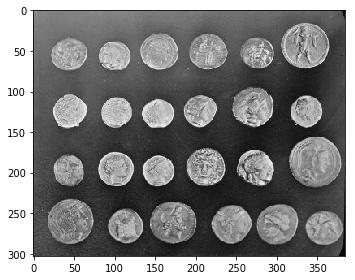

In [14]:
io.imshow(coins)
plt.show()

([array([66., 16., 12., 54., 39., 21., 16.,  8., 12., 11.]),
  array([127., 126.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([   0. ,  126.4,  252.8,  379.2,  505.6,  632. ,  758.4,  884.8,
        1011.2, 1137.6, 1264. ]),
 <a list of 2 Lists of Patches objects>)

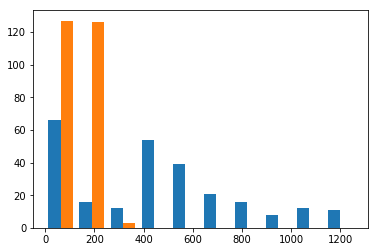

In [20]:
plt.hist(histo)

## Edge-based segmentation

In [9]:
from skimage.feature import canny

In [10]:
edges = canny(coins/255.)

In [22]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


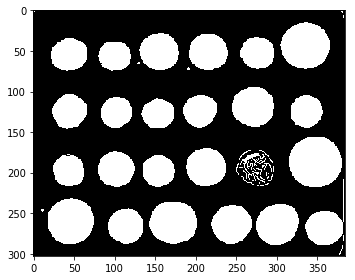

In [23]:
io.imshow(fill_coins)
plt.show()

Most coins are well segmented out of the background. 

Small objects from the background can be easily removed using the `ndi.label` function to remove objects smaller than a small threshold.

In [24]:
label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
coins_cleaned = mask_sizes[label_objects]

## Region-based segmentation

In [26]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

In [27]:
from skimage.filters import sobel

In [28]:
elevation_map = sobel(coins)

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


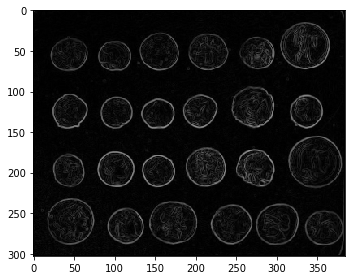

In [29]:
io.imshow(elevation_map)
plt.show()

In [33]:
# Finding markers of the background and coins based on extreme parts
# of the histogram of grey values

In [30]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


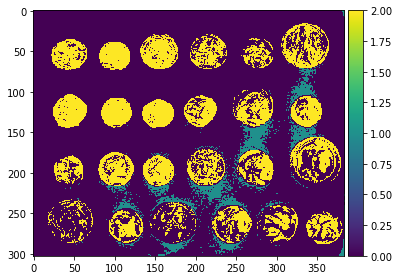

In [31]:
io.imshow(markers)
plt.show()

In [38]:
# So here, we are taking a look at everything that is at both ends
# of the histogram spectrum. The yellow is for sure coins (not background)
# the elevation map will act as a barrier in segmenting the other issues out

In [34]:
# And now computing the watershed transform:

In [35]:
from skimage.morphology import watershed

In [36]:
segmentation = watershed(elevation_map, markers)

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


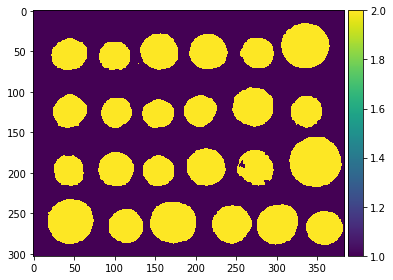

In [37]:
io.imshow(segmentation)
plt.show()

In [39]:
# Removing a few small holes with mathematical morphology:

In [40]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

In [41]:
label_coins, _ = ndi.label(segmentation)

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


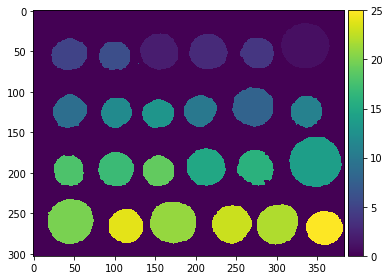

In [42]:
io.imshow(label_coins)
plt.show()